# 贝尔不等式

## 1 背景知识

### 1.1 贝尔定理

贝尔定理是物理学中著名的不可行定理，最早于 1964 年由北爱尔兰物理学家贝尔提出。它指出量子力学与定域隐变量理论是不相容的，也即任何关于定域隐变量的物理理论无法克隆量子力学的每一个结果。其中定域隐变量理论是一种对量子力学的诠释，它认为量子测量的结果是由一些目前尚未知道的参数所控制的，这些参数称为隐变量，且这些隐变量是定域的，即它们不会超过光速地影响其他地方的测量结果。  
贝尔不等式是基于定域隐变量理论推导出来的一个不等式关系。如果实验结果违反了贝尔不等式，则说明定域隐变量理论是错误的，从而验证了贝尔定理。  
2022 年的诺贝尔物理学奖颁给了法国物理学家阿兰·阿斯佩、美国理论和实验物理学家约翰·克劳泽、奥地利量子物理学家安东·蔡林格三人，以表彰他们“用纠缠光子进行实验，确立了贝尔不等式的违反，并开创了量子信息科学”。这反映了贝尔定理的重要性。同时，贝尔不等式的违反告诉我们，量子纠缠是一种根本上全新的资源，而量子计算与量子信息的的主要任务就是利用这一新资源来完成经典资源不可能或难以完成的信息处理任务。

### 1.2 贝尔不等式的推导

想象我们进行以下实验。Charlie 准备了两个粒子，他将其中一个粒子发送给 Alice，而把另一个粒子发送给 Bob。  
Alice 一收到粒子就对它进行测量。假设她有两种不同的测量设备，所以她可以选择两种不同的测量方法中的一种。这些测量的物理性质分别标记为 $P_Q$ 和 $P_R$。Alice 将在收到粒子后随机选择一种方式进行测量。为了简单起见，我们假设测量结果可以为 $+1$ 或 $-1$ 。假设 Alice 的粒子对性质 $P_Q$ 有一个值 $Q$。$Q$ 被假定为 Alice 粒子的一个仅通过测量来揭示的客观性质。同样，让 $R$ 表示由测量性质 $P_R$ 得到的值。  
类似地，假设Bob能够测量两个属性 $P_S$ 和 $P_T$ 中的一个，分别得到客观存在的属性值 $S$ 和 $T$，取值为 $+1$ 或 $-1$。Bob 在接收到粒子后随机选择一种方式进行测量。实验安排 Alice 和 Bob 同时(或者用相对论的语言描述，是以没有因果联系的方式)进行测量。则由于物理性影响的传播速度不能超过光速， Alice 与 Bob 的测量结果互不干扰。  
对量 $QS+RS+RT-QT$ 进行简单的代数运算，可得
$$ QS+RS+RT-QT=(Q+R)S+(R-Q)T $$
因为 $R,Q=±1$，所以要么 $(Q+R)S = 0$，要么 $(R-Q)T =0$。从上式容易看出，对每种情况，有 $ QS + RS + RT - QT = ±2 $。下面假设测量前处于状态 $Q = q,R = r,S = s,T = t$ 的概率是 $p(q,r,s,t)$。令 $E(·)$ 表示量的均值，则有
$$ E(QS)+E(RS)+E(RT)-E(QT)=E(QS+RS+RT-QT)=\sum_{qrst}p(q,r,s,t)(qs+rs+rt-qt)\leq\sum_{qrst}p(q,r,s,t) \times 2 = 2$$
由此得到贝尔不等式:
$$ E(QS)+E(RS)+E(RT)-E(QT)\leq 2 $$
这一结果通常也被称为 CHSH 不等式。通过多次重复实验，Alice 和 Bob 可以确定贝尔不等式左侧的每个量，从而检查它是否在实际实验中成立。

### 1.3 量子纠缠对贝尔不等式的违反

现在想象我们进行了下面的量子力学实验，Charlie 准备了一个由两量子比特组成的量子系统，处于状态
$$ | \psi\rangle =cos{\frac{\theta}{2}}|01\rangle + sin{\frac{\theta}{2}}|10\rangle,\quad\theta\in[0,2\pi) $$
他把第一个量子比特传给Alice，第二个量子比特传给Bob。他们进行对如下观测算子的测量:
$$ Q = Z_1,R = X_1 ,S = \frac{-Z_2-X_2}{\sqrt{2}},T = \frac{Z_2-X_2}{\sqrt{2}} $$
其中 $Z=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}$,$X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}$。  
通过计算可以得到这些观测算子的平均值，写成量子力学$\langle \cdot \rangle$形式是
$$ \langle QS \rangle=\frac{1}{\sqrt{2}},\langle RS \rangle = -\frac{1}{\sqrt{2}}sin\theta,\langle RT\rangle=-\frac{1}{\sqrt{2}}sin\theta,\langle QT\rangle=-\frac{1}{\sqrt{2}}. $$
因此，
$$ \langle QS \rangle+\langle RS \rangle+\langle RT \rangle-\langle QT \rangle =\sqrt{2}-\sqrt{2}sin\theta $$
当 $\theta$ 取某些特定的角度时，上式将违反贝尔不等式。下面将用 pyquafu 对此进行演示。

## 2 算法逻辑

构造量子电路，将量子比特从 $|00\rangle$ 旋转为 $|\psi\rangle =cos{\frac{\theta}{2}}|01\rangle + sin{\frac{\theta}{2}}|10\rangle$，其中 $\theta\in[0,2\pi)$。旋转测量基，分别以 $QS$,$RS$,$RT$,$QT$ 算子的本征态为基进行测量，根据测量结果求出对应算子的期望，并计算 $ \langle QS \rangle+\langle RS \rangle+\langle RT \rangle-\langle QT \rangle $ 的值。若该值大于2，则违反了贝尔不等式，同时可将实验结果与计算理论值比较。改变 $\theta$ 的值，重复前述步骤，可对不同的量子态 $|\psi\rangle$ 进行演示。

## 3 PyQuafu实现

### 3.1 构造量子态

定义一个函数来构造一个2-量子比特的纠缠态，将量子态从 $|00\rangle$ 变为 $|\psi\rangle =cos{\frac{\theta}{2}}|01\rangle + sin{\frac{\theta}{2}}|10\rangle$，其中 $\theta\in[0,2\pi)$。（注意该符号约定与常用的 Bloch 球表示不完全相同）

In [1]:
from quafu import QuantumCircuit, simulate, Task
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin, sqrt

def create_state(theta):
    """ 构造一个2量子比特的纠缠态
    |00> --> |ψ> = cos(θ/2)|01> + sin(θ/2)|10> θ∈[0,2pi)"""
    qc = QuantumCircuit(2)
    qc.ry(0, theta)
    qc.x(1)
    qc.cnot(0,1)
    qc.barrier([0,1])
    return qc

### 3.2 转换测量基

定义算子 $ Q = Z_1,R = X_1 ,S = \frac{-Z_2-X_2}{\sqrt{2}},T = \frac{Z_2-X_2}{\sqrt{2}} $，其中脚标表示算子作用于哪个量子比特。这些算子的本征值为 1 的本征态如下所示：  
$S=\frac{-Z-X}{\sqrt{2}}=\begin{pmatrix} -\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{pmatrix}$ ： $ |v_+\rangle=-\frac{1}{\sqrt{4+2\sqrt{2}}}|0\rangle+\frac{1+\sqrt{2}}{\sqrt{4+2\sqrt{2}}}|1\rangle$，  
$T=\frac{Z-X}{\sqrt{2}}=\begin{pmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\end{pmatrix}$ ： $ |u_+\rangle=-\frac{1+\sqrt{2}}{\sqrt{4+2\sqrt{2}}}|0\rangle+\frac{1}{\sqrt{4+2\sqrt{2}}}|1\rangle$，  
$R = X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix} $ ： $| + \rangle = \frac{1}{\sqrt{2}}(| 0 \rangle + | 1 \rangle)$，$ \qquad Q = Z=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}$ ： $|0\rangle$。  
根据这些算子的本征态，可定义用于旋转测量基的函数，使各个电路可以测得 $QS$,$RS$,$RT$,$QT$ 的期望。

In [2]:
phi1 = np.arccos(-1/sqrt(4+2*sqrt(2)))  # 用于旋转至S算子本征值1对应的本征态
phi2 = np.arccos(-(1+sqrt(2))/sqrt(4+2*sqrt(2)))  # 用于旋转至T算子本征值1对应的本征态

def QS(theta):
    qc = create_state(theta)
    qc.ry(1,-phi1*2)  # 将第二个量子比特的测量基至S算子本征态
    qc.measure([0,1])
    return qc
def RS(theta):
    qc = create_state(theta)
    qc.ry(0,-pi/2)  # 将第一个量子比特的测量基至X算子本征态
    qc.ry(1,-phi1*2)  # 将第二个量子比特的测量基至S算子本征态
    qc.measure([0,1])
    return qc
def RT(theta):
    qc = create_state(theta)
    qc.ry(0,-pi/2)  # 将第一个量子比特的测量基至X算子本征态
    qc.ry(1,-phi2*2)  # 将第二个量子比特的测量基至T算子本征态
    qc.measure([0,1])
    return qc
def QT(theta):
    qc = create_state(theta)
    qc.ry(1,-phi2*2)  # 将第二个量子比特的测量基至T算子本征态
    qc.measure([0,1])
    return qc
Circuit = [QS,RS,RT,QT]
Circuit_name = ['QS','RS','RT','QT']

以 $\theta = \frac{\pi}{2}$，$RS$ 的本征态做测量基为例，绘制量子电路图。

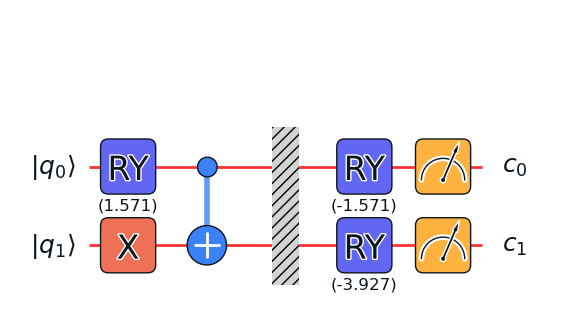

In [3]:
q = Circuit[1](theta=pi/2)
q.plot_circuit()

### 3.3 创建演示任务

定义用于创建演示任务的函数。它有 `theta_num` 与 `experimental` 两个参数，`theta_num` 用于确定 $θ$ 值的数量，`experimental` 用于选择在真机上运行或用模拟器运行。该函数将在区间 $[0，2\pi)$ 中均匀地获取 `theta_num` 个 $θ$  值进行测量，并将相应测量算子的期望 $\langle QS \rangle,\langle RS \rangle,\langle RT \rangle,\langle QT \rangle$ 放在 `obsexp` 中。  
该函数有三个返回参数，`theta`、`obsexp`、`experimental`，分别表示所取的 $θ$ 值，对应的四个期望以及它是在真机还是模拟器上运行。此外，如果在真机上运行，该函数将显示任务的历史记录，可以将其保存它以便以后查看。

In [4]:
def Bell_inequality_demo(theta_num = 5, experimental: bool = False):
    theta_step=2*pi/theta_num  
    theta=[]  # 保存θ的值
    obsexp=[]  # 保存 E(QS),E(RS),E(RT),E(QT)
    name=["θ={:.3f}*pi".format(i*theta_step/pi)  for i in range(theta_num)]  # 每个任务的名字
    groupname="Bell_inequality"  # 任务组的名字
    task = Task()  # 创建并配置Task
    task.config(backend="ScQ-P18", shots=2000, compile=True) # "ScQ-P10", "ScQ-P18", "ScQ-P136"
    if experimental:
        print("sending task...")
    for i in range(theta_num):
        theta_i = i*theta_step
        sub_obsexp=[] # 保存此次循环中E(QS),E(RS),E(RT),E(QT)的值
        for j in range(4):  # 对四种测量算子对应电路进行遍历
            qc = Circuit[j](theta_i)
            if experimental:
                sub_res = task.send(qc, name=','.join([name[i],Circuit_name[j]]), group=groupname)
                sub_obsexp.append(sub_res.calculate_obs([0,1]))
            else:
                simu_res = simulate(qc)
                sub_obsexp.append(simu_res.calculate_obs([0,1]))
        print('θ={:.3f}*pi, E(QS) = {:.6f}, E(RS) = {:.6f}, E(RT) = {:.6f}, E(QT) = {:.6f}'.format(theta_i/pi,*sub_obsexp))
        theta.append(theta_i)
        obsexp.append(sub_obsexp)
    if experimental:
        history=task.get_history()
        print("","taskid：",history,"",sep="\n")  # 保存任务id以便下次查询
    return theta,obsexp,experimental

## 4 展示运行结果

为了显示理论曲线，我们在区间 $[0,2\pi)$ 内均匀取 100 个 $\theta$ 值并计算 $\langle QS \rangle+\langle RS \rangle+\langle RT \rangle-\langle QT \rangle$ 的理论值 $\sqrt{2}-\sqrt{2}sin\theta$。

In [5]:
def Theoretical_value(theta):
    return np.sqrt(2)*(1-sin(theta))  # E(QS)+E(RS)+E(RT)-E(QT)
x = np.linspace(0, 2*pi, 100)
y = Theoretical_value(x)

In [6]:
def Plot_theoretical_value(x,y):
    plt.plot(x, y, label="Theoretical value: sqrt(2)*(1-sin(θ))")
    plt.xlabel("theta")
    plt.ylabel("E(QS)+E(RS)+E(RT)-E(QT)")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.17))

### 4.1 在模拟器上运行的结果

通过调用 `Bell_inequality_demo` 函数并将 `experimental` 参数设置为 False，我们可以得到在模拟器上运行的结果，然后可以使用 matplotlib 中的方法对其进行可视化。在图中标出了贝尔不等式的边界线，高于边界线的结果即为违反了贝尔不等式。

θ=0.000*pi, E(QS) = 0.707107, E(RS) = 0.000000, E(RT) = -0.000000, E(QT) = -0.707107
θ=0.250*pi, E(QS) = 0.707107, E(RS) = -0.500000, E(RT) = -0.500000, E(QT) = -0.707107
θ=0.500*pi, E(QS) = 0.707107, E(RS) = -0.707107, E(RT) = -0.707107, E(QT) = -0.707107
θ=0.750*pi, E(QS) = 0.707107, E(RS) = -0.500000, E(RT) = -0.500000, E(QT) = -0.707107
θ=1.000*pi, E(QS) = 0.707107, E(RS) = 0.000000, E(RT) = -0.000000, E(QT) = -0.707107
θ=1.250*pi, E(QS) = 0.707107, E(RS) = 0.500000, E(RT) = 0.500000, E(QT) = -0.707107
θ=1.500*pi, E(QS) = 0.707107, E(RS) = 0.707107, E(RT) = 0.707107, E(QT) = -0.707107
θ=1.750*pi, E(QS) = 0.707107, E(RS) = 0.500000, E(RT) = 0.500000, E(QT) = -0.707107
θ=0.000*pi, E(QS)+E(RS)+E(RT)-E(QT)=1.414214
θ=0.250*pi, E(QS)+E(RS)+E(RT)-E(QT)=0.414214
θ=0.500*pi, E(QS)+E(RS)+E(RT)-E(QT)=-0.000000
θ=0.750*pi, E(QS)+E(RS)+E(RT)-E(QT)=0.414214
θ=1.000*pi, E(QS)+E(RS)+E(RT)-E(QT)=1.414214
θ=1.250*pi, E(QS)+E(RS)+E(RT)-E(QT)=2.414214
θ=1.500*pi, E(QS)+E(RS)+E(RT)-E(QT)=2.828427
θ=1.

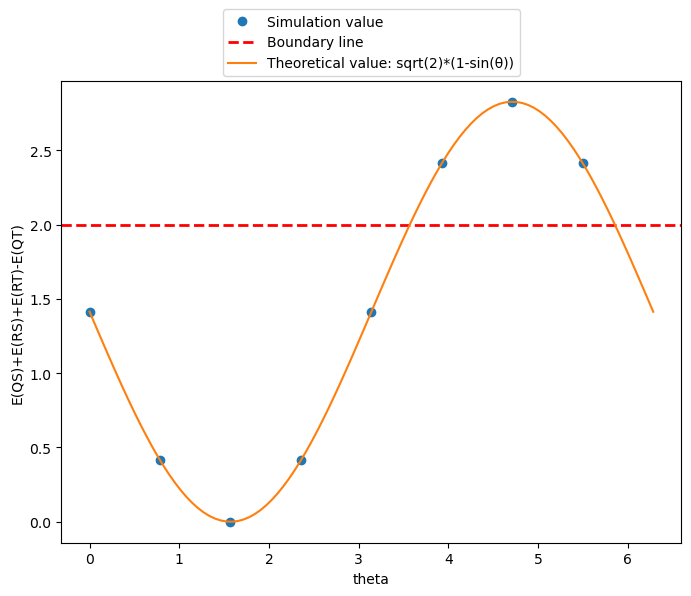

In [7]:
theta, obsexp, experimental = Bell_inequality_demo(theta_num = 8, experimental = False)
res=[obsexp[i][0] + obsexp[i][1] + obsexp[i][2] - obsexp[i][3] for i in range(len(obsexp))]  # E(QS)+E(RS)+E(RT)-E(QT)
for i in range(len(res)):
    print("θ={:.3f}*pi,".format(theta[i]/pi),"E(QS)+E(RS)+E(RT)-E(QT)={:.6f}".format(res[i]))  # 展示结果数据
# 展示结果图
plt.figure(figsize=(8, 6)) # 设置图片大小
plt.plot(theta, res, "o", label="Simulation value")
plt.axhline(y=2, color='red', linestyle='--', linewidth=2, label='Boundary line')  # 画出贝尔不等式的边界线
Plot_theoretical_value(x,y)
plt.show()

### 4.2 在真机上运行的结果

将 `experimental` 参数设置为 True，我们可以得到在真机上运行的结果，同时所运行任务的历史也将显示。

sending task...
θ=0.000*pi, E(QS) = 0.723000, E(RS) = -0.001000, E(RT) = -0.043000, E(QT) = -0.656000
θ=0.250*pi, E(QS) = 0.717000, E(RS) = -0.450000, E(RT) = -0.537000, E(QT) = -0.555000
θ=0.500*pi, E(QS) = 0.681000, E(RS) = -0.622000, E(RT) = -0.715000, E(QT) = -0.679000
θ=0.750*pi, E(QS) = 0.711000, E(RS) = -0.476000, E(RT) = -0.536000, E(QT) = -0.671000
θ=1.000*pi, E(QS) = 0.577000, E(RS) = 0.030000, E(RT) = -0.039000, E(QT) = -0.691000
θ=1.250*pi, E(QS) = 0.708000, E(RS) = 0.452000, E(RT) = 0.505000, E(QT) = -0.710000
θ=1.500*pi, E(QS) = 0.685000, E(RS) = 0.628000, E(RT) = 0.697000, E(QT) = -0.659000
θ=1.750*pi, E(QS) = 0.720000, E(RS) = 0.480000, E(RT) = 0.461000, E(QT) = -0.677000

taskid：
{'Bell_inequality': ['323A1A602DA02914', '323A1B0004B47F8F', '323A1B9012DC5A98', '323A1C2021292E75', '323A1CB033CAC233', '323A1D6008553591', '323A1DF018773AB6', '323A1E802650E61D', '323A1F103915EFFB', '323A1FB00DAE3A4D', '323A20401BB40695', '323A20D029C99220', '323A216036A1EA85', '323A22000A05

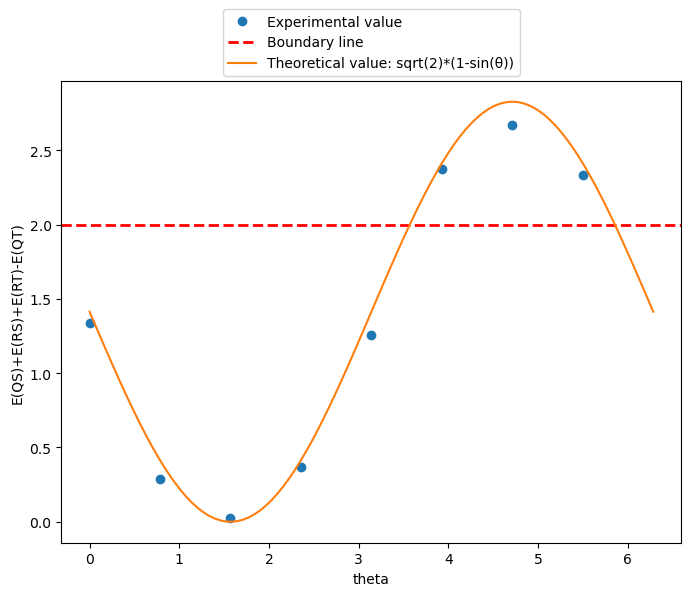

In [8]:
theta, obsexp, experimental = Bell_inequality_demo(theta_num = 8, experimental = True)
res=[obsexp[i][0] + obsexp[i][1] + obsexp[i][2] - obsexp[i][3] for i in range(len(obsexp))]  # E(QS)+E(RS)+E(RT)-E(QT)
for i in range(len(res)):
    print("θ={:.3f}*pi,".format(theta[i]/pi),"E(QS)+E(RS)+E(RT)-E(QT)={:.6f}".format(res[i]))  # 展示结果数据
# 展示结果图
plt.figure(figsize=(8, 6)) # 设置图片大小
plt.plot(theta, res, "o", label="Experimental value")
plt.axhline(y=2, color='red', linestyle='--', linewidth=2, label='Boundary line')  # 画出贝尔不等式的边界线
Plot_theoretical_value(x,y)
plt.show()

可以看到，实验结果与理论计算值十分接近，同时观测到了贝尔不等式的违反。